In [1]:
import os
from pathlib import Path

NOTEBOOK_PATH: Path = Path(os.path.abspath(''))

DATA_PATH: Path = NOTEBOOK_PATH.parent.joinpath('data')

PATH_FOR_RESULT: Path = NOTEBOOK_PATH.joinpath('RESULT')

if not PATH_FOR_RESULT.exists():
    PATH_FOR_RESULT.mkdir()

print(f'当前运行目录：{NOTEBOOK_PATH}')
print(f'当前数据目录：{DATA_PATH}')

当前运行目录：D:\Development\Python\InvestmentWorkshop\notebook
当前数据目录：D:\Development\Python\InvestmentWorkshop\data


# 缠论 B-01-2

在[缠论 B-01-1](chan_B_01-1.ipynb)的基础上，程序化合并K线。

## 准备

### 引用模块

In [2]:
import pandas as pd

from utility import (
    get_available_datafile_name,
    load_csv_as_dataframe,
)
from InvestmentWorkshop.indicator import (
    pbx,
    chan_on_bar_dataframe,
    plot_chan_dataframe
)

Load succeed.


### 设置 pandas

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

### 可用数据

In [4]:
available_datafile = get_available_datafile_name(DATA_PATH, 'Minute')
for symbol, period in available_datafile:
    print(f'symbol: {symbol:>12}, period: {period}')

symbol:    DCE.c2201, period: Minute
symbol:    DCE.i2201, period: Minute
symbol:  SHFE.ag2106, period: Minute
symbol:  SHFE.al2111, period: Minute
symbol:  SHFE.al2112, period: Minute
symbol:  SHFE.hc2110, period: Minute
symbol:  SHFE.hc2201, period: Minute
symbol:  SHFE.hc2202, period: Minute
symbol:  SHFE.rb2201, period: Minute


### 声明数据

使用分钟数据。

In [5]:
symbol: str = 'SHFE.al2112'
period: str = 'Minute'

### 加载数据

In [6]:
origin_data: pd.DataFrame = load_csv_as_dataframe(DATA_PATH.joinpath(f'{symbol}_{period}.csv'))
df_ohlc: pd.DataFrame = origin_data.loc['2021-10-15 13:30:00':'2021-10-19 00:59:00', ['open', 'high', 'low', 'close']]

df_ohlc.info()
print('-' * 100)
df_ohlc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 795 entries, 2021-10-15 13:30:00 to 2021-10-19 00:59:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    795 non-null    float64
 1   high    795 non-null    float64
 2   low     795 non-null    float64
 3   close   795 non-null    float64
dtypes: float64(4)
memory usage: 31.1 KB
----------------------------------------------------------------------------------------------------


,open,high,low,close
datetime,,,,
2021-10-15 13:30:00,23900.0,23900.0,23840.0,23845.0
2021-10-15 13:31:00,23845.0,23895.0,23845.0,23895.0
2021-10-15 13:32:00,23895.0,23895.0,23855.0,23875.0
2021-10-15 13:33:00,23875.0,23895.0,23840.0,23845.0
2021-10-15 13:34:00,23845.0,23855.0,23830.0,23830.0


### 定义计算结果

In [7]:
# df_chan 只是便于观察的中间结果。
df_chan: pd.DataFrame

## 结果（100根K线）

### 计算

In [8]:
count: int = 100
df_chan = chan_on_bar_dataframe(df_ohlc, count, debug=True)

第    0 /  100 （普通K线）轮：
    前K线（缠论K线）：idx = 0, 高点 = 23900.0, 低点 = 23840.0
    本K线（普通K线）：idx = 0, 高点 = 23900.0, 低点 = 23840.0

第    1 /  100 （普通K线）轮：
    前K线（缠论K线）：idx = 0, 高点 = 23900.0, 低点 = 23840.0
    本K线（普通K线）：idx = 1, 高点 = 23895.0, 低点 = 23845.0

    处理分型（缠论K线数量<2）：略过。

    【本轮处理完毕】，费时 0:00:00.007006。

    K线关系：包含
    缠论K线数量：1，缠论高点：23900.0，缠论低点：23840.0，
    前1缠论K线：（首根）0 ～ （末根）1，周期：2；
    前2缠论K线：（首根）-1 ～ （末根）-1，周期：不存在；
    前3缠论K线：（首根）-1 ～ （末根）-1。

第    2 /  100 （普通K线）轮：
    前K线（缠论K线）：idx = 1, 高点 = 23900.0, 低点 = 23840.0
    本K线（普通K线）：idx = 2, 高点 = 23895.0, 低点 = 23855.0

    处理分型（缠论K线数量<2）：略过。

    【本轮处理完毕】，费时 0:00:00.010971。

    K线关系：包含
    缠论K线数量：1，缠论高点：23900.0，缠论低点：23840.0，
    前1缠论K线：（首根）0 ～ （末根）2，周期：3；
    前2缠论K线：（首根）-1 ～ （末根）-1，周期：不存在；
    前3缠论K线：（首根）-1 ～ （末根）-1。

第    3 /  100 （普通K线）轮：
    前K线（缠论K线）：idx = 2, 高点 = 23900.0, 低点 = 23840.0
    本K线（普通K线）：idx = 3, 高点 = 23895.0, 低点 = 23840.0

    处理分型（缠论K线数量<2）：略过。

    【本轮处理完毕】，费时 0:00:00.012965。

    K线关系：包含
    缠论K线数量：1，缠论高点：23900.0，缠

### 数据

In [9]:
pd.set_option('display.max_rows', count)
df_chan.head(count)

,包含？,缠论K线数量,缠论周期,缠论高点,缠论低点,分型类型,分型性质
0,False,1,1,23900.0,23840.0,-,-
1,True,1,2,23900.0,23840.0,-,-
2,True,1,3,23900.0,23840.0,-,-
3,True,1,4,23900.0,23840.0,顶,临时
4,False,2,1,23855.0,23830.0,-,-
5,True,2,2,23855.0,23830.0,底,临时
6,False,3,1,23900.0,23875.0,-,-
7,False,4,1,23915.0,23880.0,顶,临时
8,False,5,1,23890.0,23845.0,-,-
9,True,5,2,23885.0,23845.0,底,临时


### 绘图

Done.


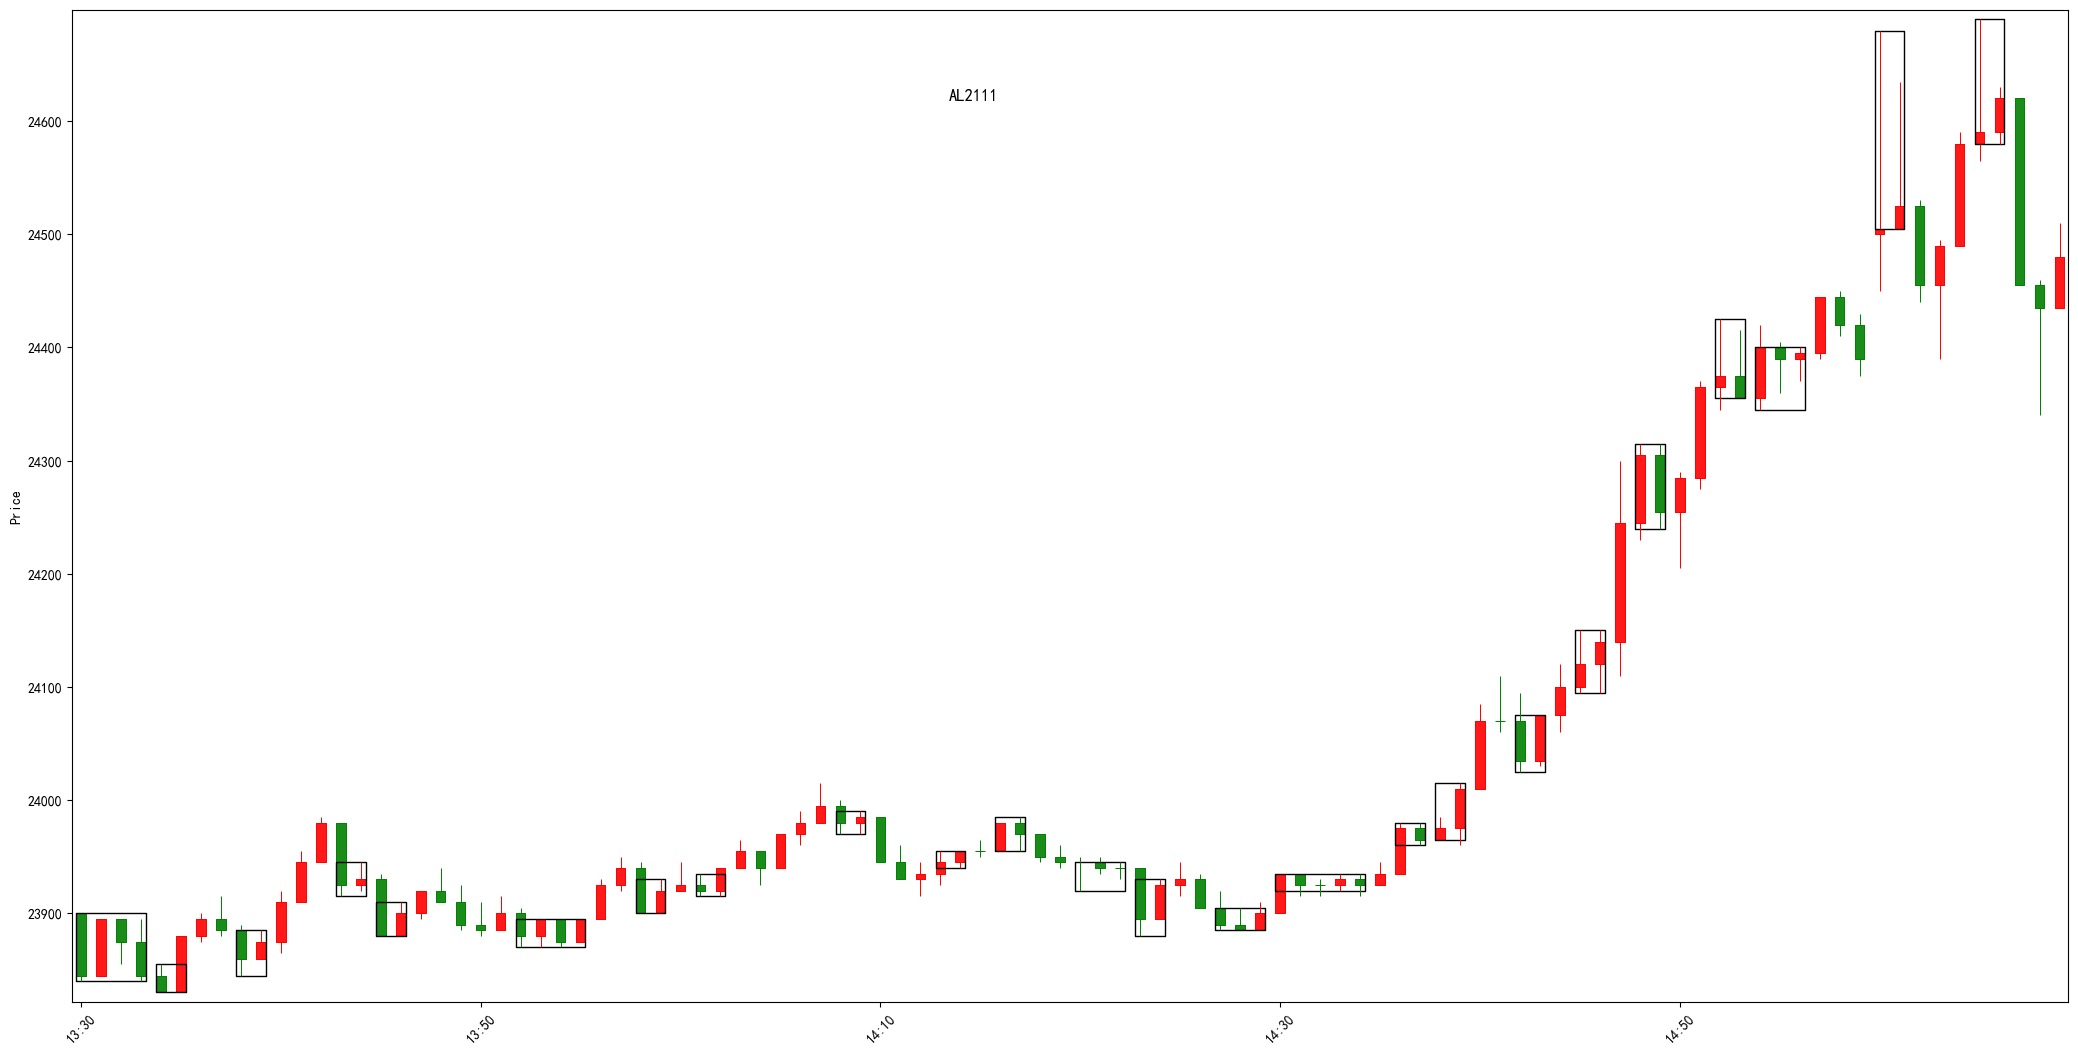

In [10]:
plot_chan_dataframe(df_ohlc, df_chan, count)

## 结果（500根K线）

In [11]:
# count: int = 500
# df_chan = chan_on_bar_dataframe(df_ohlc, count)

# plot_chan_dataframe(df_ohlc, df_chan, count)

In [12]:
# pd.set_option('display.max_rows', count)
# df_chan.head(count)